In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import statistics as sts
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("dataset/nigeria_houses_data.csv")

In [3]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [5]:
df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [6]:
df.isna().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [7]:
object_column_names = df.select_dtypes(include=['object']).columns
print(object_column_names)  # Prints the names of the object columns

Index(['title', 'town', 'state'], dtype='object')


In [8]:
object_columns = df.select_dtypes(include=['object'])

for column in object_columns:
    print(f"Value counts for column: {column}")
    print(df[column].value_counts())
    print("\n")


Value counts for column: title
title
Detached Duplex           13992
Terraced Duplexes          3237
Semi Detached Duplex       2615
Detached Bungalow          2108
Block of Flats             1745
Semi Detached Bungalow      452
Terraced Bungalow           177
Name: count, dtype: int64


Value counts for column: town
town
Lekki           10895
Ajah             2164
Ikoyi            1547
Ikeja             688
Ibeju Lekki       503
                ...  
Ethiope West        1
Jos North           1
Orile               1
Ohaji/Egbema        1
Ikpoba Okha         1
Name: count, Length: 189, dtype: int64


Value counts for column: state
state
Lagos          18445
Abuja           3524
Ogun             637
Oyo              477
Rivers           444
Imo              246
Anambara         145
Enugu            128
Edo              100
Delta             63
Akwa Ibom         25
Kaduna            23
Osun              12
Ekiti              9
Abia               9
Nasarawa           9
Kwara              9

##### Exploratory Data Analysis (EDA)

In [10]:
def plot_data_with_outliers(data, outliers):
    plt.figure(figsize=(10, 6))

    # Plot original data points
    plt.plot(data, 'bo', label='Data')

    # Highlight the outliers
    outlier_indices = [i for i, x in enumerate(data) if x in outliers]
    plt.plot(outlier_indices, outliers, 'ro', label='Outliers')

    plt.title('Data Points with Outliers Highlighted')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


In [11]:
def find_outliers(data, multiplier=3):
    mean = sts.mean(data)
    std_dev = sts.stdev(data)
    
    cut_off = std_dev * multiplier
    lower_limit = mean - cut_off
    upper_limit = mean + cut_off
    
    # Using list comprehension for conciseness
    outliers = [x for x in data if x < lower_limit or x > upper_limit]
    plot_data_with_outliers(data, outliers)
    sns.kdeplot(data)
    return outliers

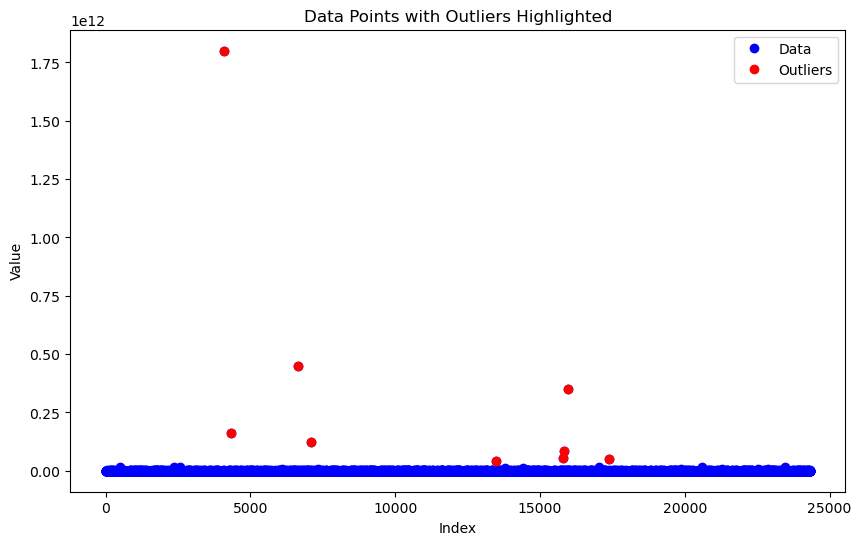

C:\Users\alain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


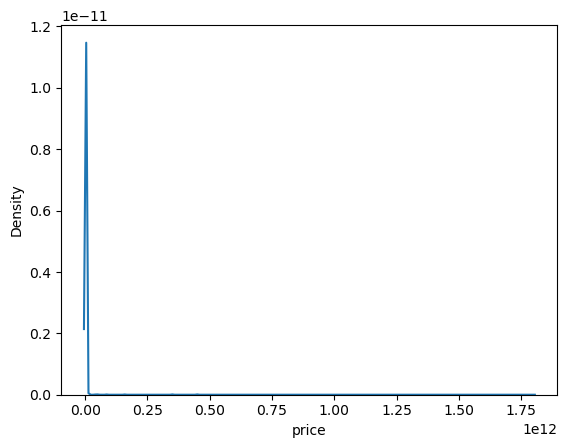

In [12]:
data = df.price
outliers = find_outliers(data)

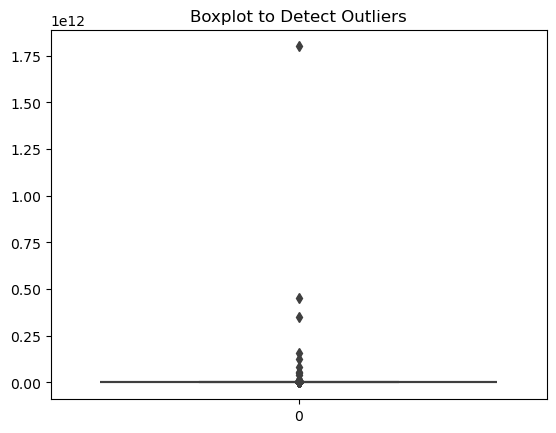

In [13]:
d = [data]
sns.boxplot(d)
plt.title('Boxplot to Detect Outliers')
plt.show()

In [14]:
df["price_transformed"] = np.log(data)

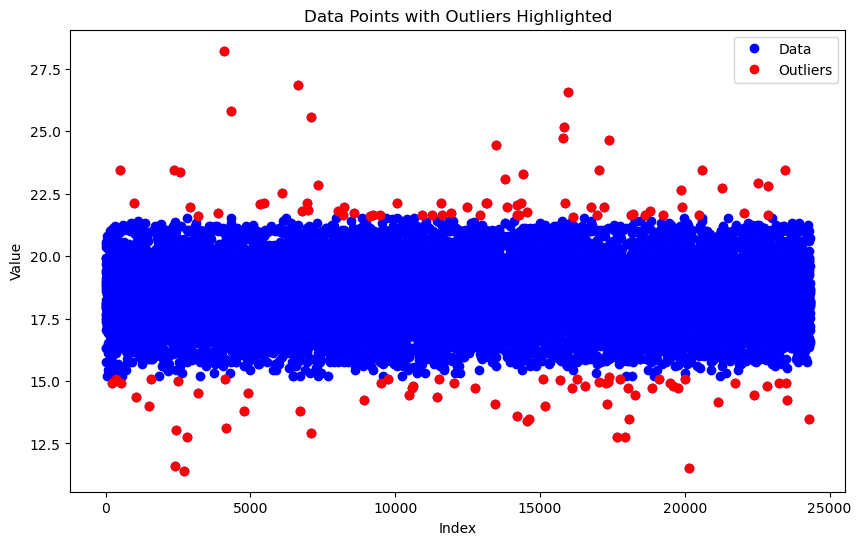

C:\Users\alain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


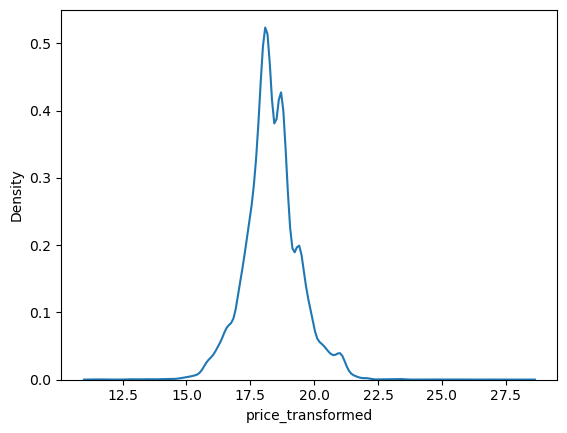

In [15]:
pt_outliers = find_outliers(df["price_transformed"])

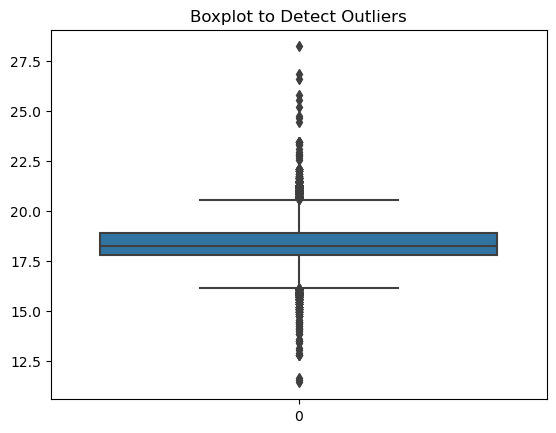

In [16]:
sns.boxplot(df["price_transformed"])
plt.title('Boxplot to Detect Outliers')
plt.show()

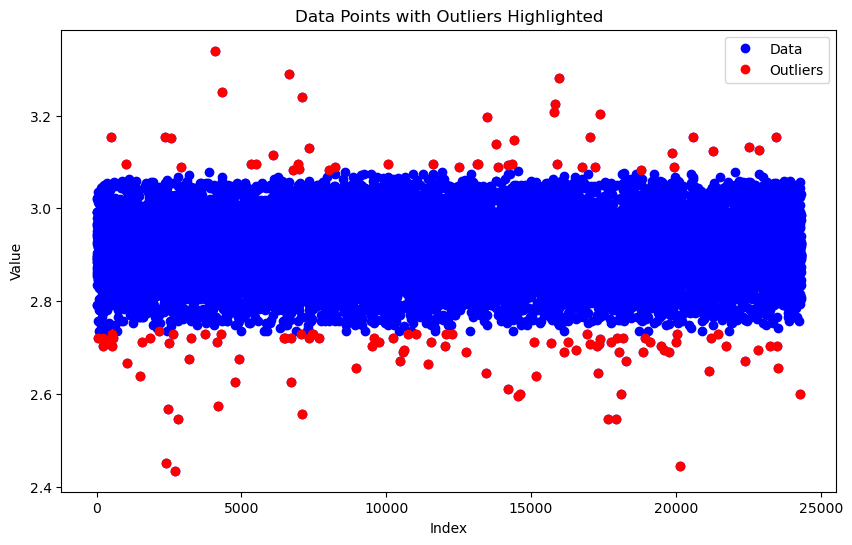

C:\Users\alain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


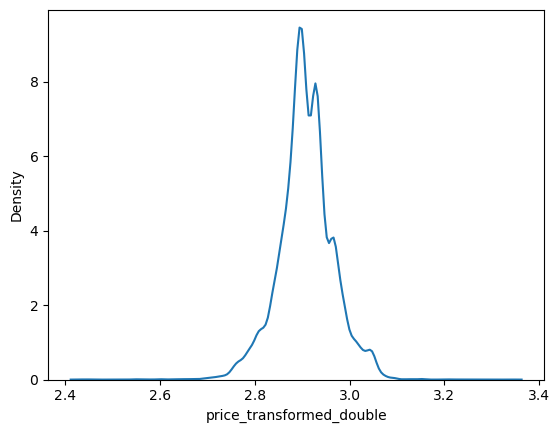

In [17]:
df["price_transformed_double"] = np.log(df["price_transformed"])
ptd_outliers = find_outliers(df["price_transformed_double"])

In [18]:
df["price_transformed_double"].skew()

-0.12779540545444454

In [19]:
df["price_transformed"].skew()

0.22842031475239294

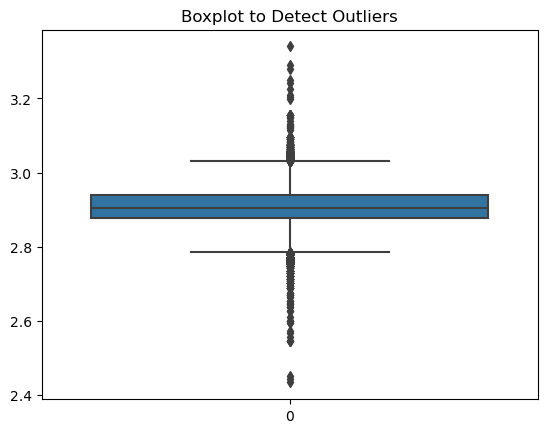

In [20]:
sns.boxplot(df["price_transformed_double"])
plt.title('Boxplot to Detect Outliers')
plt.show()

In [21]:
def plot_distribution(column_name):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column_name], bins=range(1, 12), edgecolor='black', alpha=0.7)
    
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(f'{column_name}')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 11))
    
    plt.show()

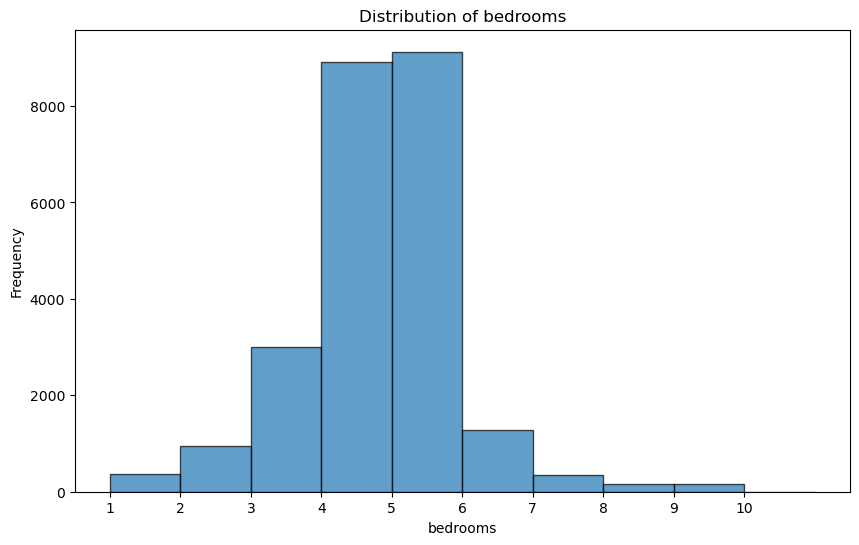

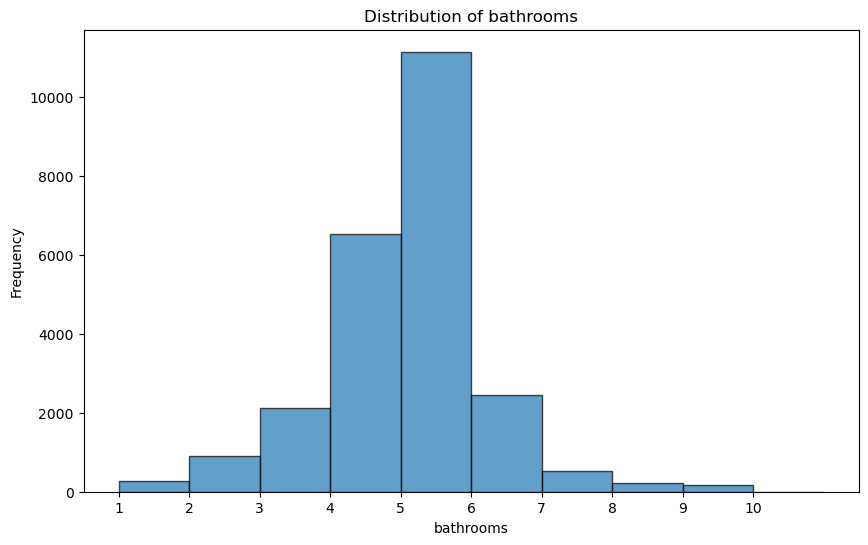

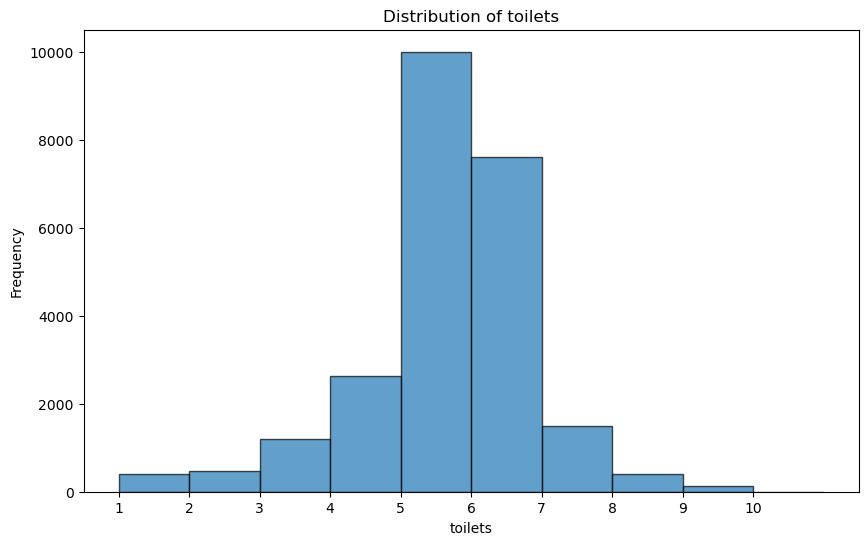

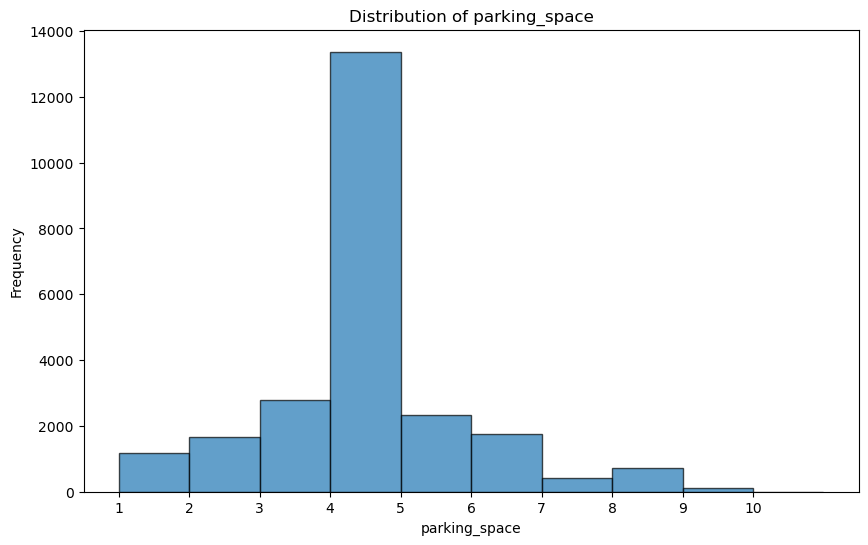

In [22]:
for i in df.select_dtypes(include=['float64']).columns:
    if i not in ["price", "price_transformed_double", "price_transformed"]:
        plot_distribution(i)

In [23]:
for i in df.select_dtypes(include=['float64']).columns:
    if i not in ["price", "price_transformed_double", "price_transformed"]:
        print(f"{i} values--> min: {df[i].min()}, max: {df[i].max()}")

bedrooms values--> min: 1.0, max: 9.0
bathrooms values--> min: 1.0, max: 9.0
toilets values--> min: 1.0, max: 9.0
parking_space values--> min: 1.0, max: 9.0


In [24]:
def check_corrlation(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64'])
    
    # Calculate the correlation matrix
    correlation_matrix = numerical_columns.corr()
    
    # Plot the heatmap for the correlation matrix
    plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    
    # Display the plot
    plt.title('Correlation Matrix Heatmap')
    plt.show()

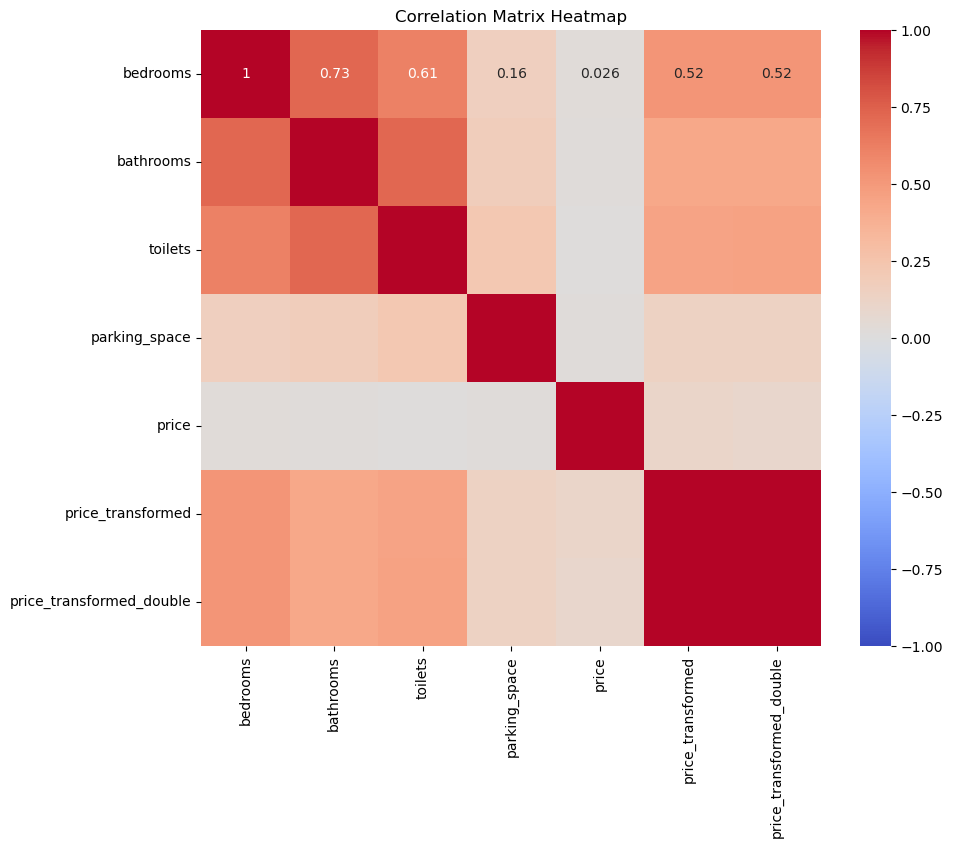

In [25]:
check_corrlation(df)

In [26]:
df["title"].unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [27]:
title_rankings = {
    'Detached Duplex': 1,
    'Semi Detached Duplex': 2,
    'Terraced Duplexes': 3,
    'Detached Bungalow': 4,
    'Semi Detached Bungalow': 5,
    'Block of Flats': 6,
    'Terraced Bungalow': 7
}

In [28]:
df['title_rank'] = df['title'].map(title_rankings)

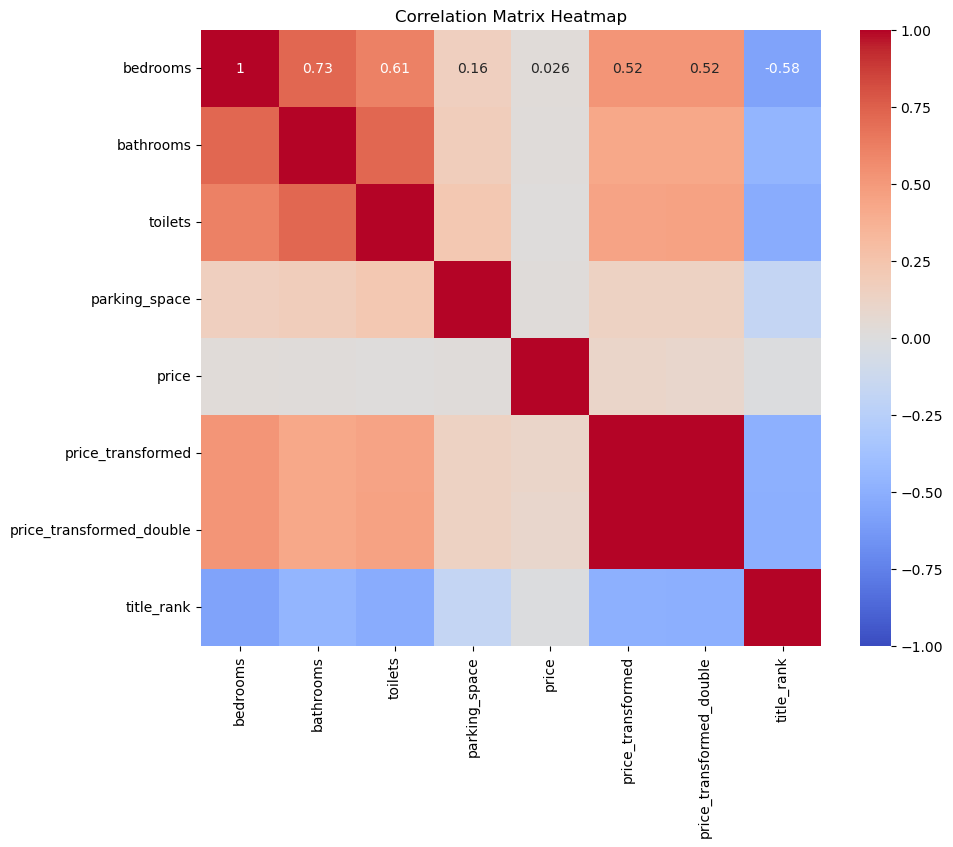

In [29]:
check_corrlation(df)

In [30]:
df_unique = df.drop_duplicates(subset=['state', 'town'])

In [31]:
df_unique.groupby('state')['town'].apply(list).to_dict()

{'Abia': ['Aba', 'Umuahia'],
 'Abuja': ['Mabushi',
  'Katampe',
  'Lokogoma District',
  'Kaura',
  'Galadimawa',
  'Gwarinpa',
  'Lugbe District',
  'Jahi',
  'Orozo',
  'Guzape District',
  'Idu Industrial',
  'Utako',
  'Kuje',
  'Life Camp',
  'Dape',
  'Gaduwa',
  'Dakwo',
  'Asokoro District',
  'Wuye',
  'Kubwa',
  'Apo',
  'Wuse 2',
  'Durumi',
  'Maitama District',
  'Karsana',
  'Wuse',
  'Kurudu',
  'Karmo',
  'Gudu',
  'Kukwaba',
  'Mbora (Nbora)',
  'Jabi',
  'Garki',
  'Karshi',
  'Kado',
  'Nyanya',
  'Kyami',
  'Dutse',
  'Karu',
  'Kafe',
  'Dakibiyu',
  'Bwari',
  'Kagini',
  'Mpape',
  'Gwagwalada',
  'Diplomatic Zones',
  'Kabusa',
  'Dei-Dei',
  'Duboyi',
  'Jikwoyi',
  'Central Business District',
  'Wumba',
  'Mararaba'],
 'Akwa Ibom': ['Uyo', 'Ikot Ekpene', 'Eket'],
 'Anambara': ['Lekki',
  'Ibeju Lekki',
  'Agege',
  'Ikoyi',
  'Mowe Ofada',
  'Yaba',
  'Ifako-Ijaiye',
  'Mowe Town',
  'Port Harcourt',
  'Ajah',
  'Ikeja',
  'Alimosho',
  'Ibadan',
  'Ketu',
  

In [32]:
d = df[df["state"] == "Anambara"]

In [33]:
d["town"].unique()

array(['Lekki', 'Ibeju Lekki', 'Agege', 'Ikoyi', 'Mowe Ofada', 'Yaba',
       'Ifako-Ijaiye', 'Mowe Town', 'Port Harcourt', 'Ajah', 'Ikeja',
       'Alimosho', 'Ibadan', 'Ketu', 'Mbora (Nbora)',
       'Victoria Island (VI)', 'Gwarinpa', 'Akure', 'Karu', 'Ikorodu',
       'Ikotun', 'Lokogoma District', 'Shomolu', 'Guzape District',
       'Owerri Municipal', 'Katampe', 'Magboro', 'Gbagada', 'Ojo',
       'Arepo', 'Jabi'], dtype=object)

In [34]:
df.loc[df['state'] == 'Anambara', 'town'] = 'Awka'

In [35]:
df.loc[df['state'] == 'Kano', 'town'] = 'Kano'

In [36]:
df["townState"] = df['town'] + df['state']

In [37]:
df["townState"] 

0                     MabushiAbuja
1                     KatampeAbuja
2                       LekkiLagos
3                        AjahLagos
4                       LekkiLagos
                   ...            
24321                  KabusaAbuja
24322              Ado-Odo/OtaOgun
24323                   LekkiLagos
24324    Victoria Island (VI)Lagos
24325                   LekkiLagos
Name: townState, Length: 24326, dtype: object

In [38]:
df['townState'] = df['townState'].str.lower()

In [39]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,price_transformed,price_transformed_double,title_rank,townState
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0,19.924758,2.991963,1,mabushiabuja
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,20.500122,3.020431,3,katampeabuja
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,18.603002,2.923323,1,lekkilagos
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,17.504390,2.862452,1,ajahlagos
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,18.132999,2.897733,2,lekkilagos


In [40]:
df_model = df.drop(["title", "town", "state", "price_transformed","price"], axis = 1)

In [41]:
df_model.head()

,bedrooms,bathrooms,toilets,parking_space,price_transformed_double,title_rank,townState
0,6.0,5.0,5.0,4.0,2.991963,1,mabushiabuja
1,4.0,5.0,5.0,4.0,3.020431,3,katampeabuja
2,4.0,5.0,5.0,4.0,2.923323,1,lekkilagos
3,4.0,4.0,5.0,6.0,2.862452,1,ajahlagos
4,4.0,4.0,5.0,2.0,2.897733,2,lekkilagos


In [42]:
X = pd.get_dummies(df_model.drop('price_transformed_double', axis=1), columns=['townState'], drop_first=True)
y = df_model['price_transformed_double']

In [43]:
X

,bedrooms,bathrooms,toilets,parking_space,title_rank,townState_abeokuta northogun,townState_abeokuta southogun,townState_abrakadelta,townState_ado-ekitiekiti,townState_ado-odo/otaogun,...,townState_uyoakwa ibom,townState_victoria island (vi)lagos,townState_warridelta,townState_wumbaabuja,townState_wuse 2abuja,townState_wuseabuja,townState_wuyeabuja,townState_yabalagos,townState_yenagoabayelsa,townState_yewa southogun
0,6.0,5.0,5.0,4.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.0,5.0,5.0,4.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.0,5.0,5.0,4.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.0,4.0,5.0,6.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.0,4.0,5.0,2.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24322,4.0,5.0,5.0,4.0,6,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
24323,4.0,5.0,5.0,4.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24324,3.0,4.0,4.0,3.0,6,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [44]:
y

0        2.991963
1        3.020431
2        2.923323
3        2.862452
4        2.897733
           ...   
24321    2.804787
24322    2.835234
24323    2.892315
24324    2.899894
24325    2.889810
Name: price_transformed_double, Length: 24326, dtype: float64

In [45]:
X.to_csv("dataset/X_data.csv", index = False)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Development

In [48]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R^2: {r2:.2f}")

    with open(f'models/{model_name}.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)

###### 1. Linear Regression

In [50]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
evaluate_model(linear_reg, X_train, X_test, y_train, y_test, "linear_reg")

Mean Absolute Error (MAE): 30038000.60
Mean Squared Error (MSE): 959209832931911168.00
Root Mean Squared Error (RMSE): 979392583.66
R^2: -295526172893176856576.00


###### 2. Ridge Regression

In [52]:
ridge_reg = Ridge(alpha=1.0)
evaluate_model(ridge_reg, X_train, X_test, y_train, y_test, "ridge_reg")

Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
R^2: 0.67


###### 3. Lasso Regression

In [54]:
lasso_reg = Lasso(alpha=0.1)
evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, "lasso_reg")

Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06
R^2: -0.00


###### 4. Decision Tree Regressor

In [56]:
decision_tree = DecisionTreeRegressor(random_state=42)
evaluate_model(decision_tree, X_train, X_test, y_train, y_test, "decision_tree")

Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.04
R^2: 0.61


###### 5. Random Forest Regressor

In [58]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(random_forest, X_train, X_test, y_train, y_test, "random_forest")

Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
R^2: 0.69


###### 6. Gradient Boosting (XGBoost)

In [60]:
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
evaluate_model(xgb_reg, X_train, X_test, y_train, y_test, "xgb_reg")

Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
R^2: 0.69


###### 7. Support Vector Regressor (SVR)

In [62]:
svr_reg = SVR(kernel='linear')
evaluate_model(svr_reg, X_train, X_test, y_train, y_test, "svr_reg")

Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.04
R^2: 0.51


###### 8. K-Nearest Neighbors Regressor

In [64]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn_reg, X_train, X_test, y_train, y_test, "knn_reg")

Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
R^2: 0.63


In [65]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,price_transformed,price_transformed_double,title_rank,townState
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0,19.924758,2.991963,1,mabushiabuja
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,20.500122,3.020431,3,katampeabuja
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,18.603002,2.923323,1,lekkilagos
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,17.504390,2.862452,1,ajahlagos
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,18.132999,2.897733,2,lekkilagos


In [66]:
df_unique = df.drop_duplicates(subset=['state', 'town'])

In [67]:
state_town_dict = df_unique.groupby('state')['town'].apply(list).to_dict()

In [68]:
with open('models/state_town_dict.json', 'w') as json_file:
    json.dump(state_town_dict, json_file)

In [69]:
house_title = list(df["title"].unique())

In [70]:
with open('models/house_title.json', 'w') as f:
    json.dump(house_title, f)

##### Hyperparameter Tuning using GridSearchCV

In [75]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"Best Parameters: {model.best_params_}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}")


###### 1. Random Forest with GridSearchCV

In [78]:
rf = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


Random Forest Regressor with GridSearchCV


In [80]:
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)
evaluate_model(rf_grid, X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
RMSE: 0.03
R^2: 0.70


###### 2. XGBoost with GridSearchCV

In [82]:
xgb = XGBRegressor(random_state=42)
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


XGBoost Regressor with GridSearchCV


In [83]:
xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=3, n_jobs=-1, verbose=2)
xgb_grid.fit(X_train, y_train)
evaluate_model(xgb_grid, X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
RMSE: 0.03
R^2: 0.71


###### 3. Support Vector Regressor (SVR) with GridSearchCV

In [85]:
svr = SVR()
svr_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.01, 0.001]
}


SVR with GridSearchCV


In [ ]:
svr_grid = GridSearchCV(estimator=svr, param_grid=svr_param_grid, cv=3, n_jobs=-1, verbose=2)
svr_grid.fit(X_train, y_train)
evaluate_model(svr_grid, X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
